
Gate: AND
True      : [0, 0, 0, 1]
Predicted : [0, 0, 0, 1]
Accuracy  : 100.0%
Weights   : [0.2 0.1], Bias: -0.20

Gate: OR
True      : [0, 1, 1, 1]
Predicted : [0, 1, 1, 1]
Accuracy  : 100.0%
Weights   : [0.1 0.1], Bias: -0.10

Gate: NAND
True      : [1, 1, 1, 0]
Predicted : [1, 1, 1, 0]
Accuracy  : 100.0%
Weights   : [-0.2 -0.1], Bias: 0.20

Gate: XOR
True      : [0, 1, 1, 0]
Predicted : [1, 1, 0, 0]
Accuracy  : 50.0%
Weights   : [-0.1  0. ], Bias: 0.00


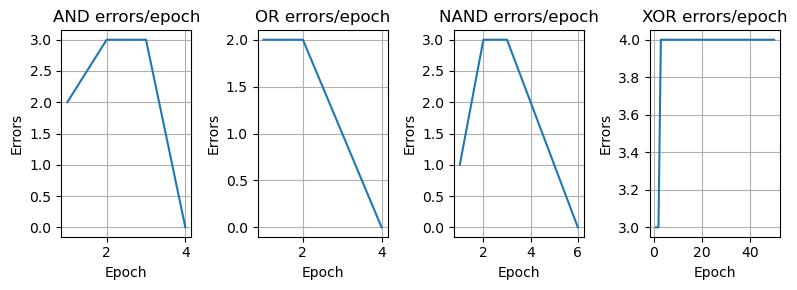

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Simple Perceptron Class
# -------------------------------
class Perceptron:
    def __init__(self, n_inputs, lr=0.1, epochs=50):
        self.w = np.zeros(n_inputs)   # weights
        self.b = 0.0                  # bias
        self.lr = lr
        self.epochs = epochs
        self.history = []             # errors per epoch

    def activation(self, z):
        return 1 if z >= 0 else 0     #if a) Z>+0, THEN pred =1    , otherwise, b) z<0, then pred =0

    def predict_single(self, x):
        return self.activation(np.dot(self.w, x) + self.b)   #calculating z= (w.x) + c

    def predict(self, X):
        return np.array([self.predict_single(x) for x in X])   # predict whole dataset, that is all rows

    def fit(self, X, y):
        self.history = []
        for _ in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                yhat = self.predict_single(xi)
                error = yi - yhat
                if error != 0:                        # error balancing
                    self.w += self.lr * error * xi    # w = w + (η * error * x)
                    self.b += self.lr * error         # b = b + (η * error)
                    errors += 1
            self.history.append(errors)
            if errors == 0:   # converged early
                break

# -------------------------------
# Datasets for logic gates
# -------------------------------
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)

gates = {
    "AND":  np.array([0,0,0,1]),
    "OR":   np.array([0,1,1,1]),
    "NAND": np.array([1,1,1,0]),
    "XOR":  np.array([0,1,1,0])
}

# -------------------------------
# Train + Test on all gates
# -------------------------------
results = {}
for name, y in gates.items():
    p = Perceptron(n_inputs=2, lr=0.1, epochs=50)
    p.fit(X, y)
    preds = p.predict(X)
    acc = (preds == y).mean()
    results[name] = {"pred": preds.tolist(), "acc": acc, "weights": p.w, "bias": p.b, "history": p.history}

# -------------------------------
# Print results
# -------------------------------
for gate, info in results.items():
    print("\n==============================")
    print(f"Gate: {gate}")
    print("True      :", gates[gate].tolist())
    print("Predicted :", info["pred"])
    print(f"Accuracy  : {info['acc']*100:.1f}%")
    print(f"Weights   : {info['weights']}, Bias: {info['bias']:.2f}")

# -------------------------------
# Plot learning curve for AND vs XOR
# -------------------------------
plt.figure(figsize=(8,3))
for i, gate in enumerate(["AND","OR","NAND","XOR"], start=1):
    plt.subplot(1,4,i)
    plt.plot(range(1, len(results[gate]["history"])+1), results[gate]["history"])
    plt.title(f"{gate} errors/epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Errors")
    plt.grid(True)
plt.tight_layout()
plt.show()


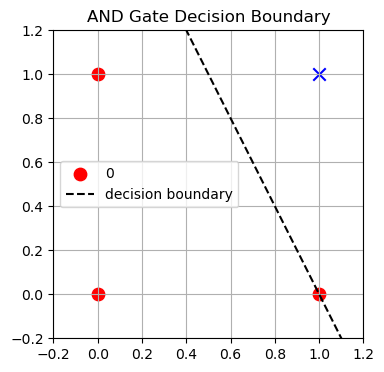

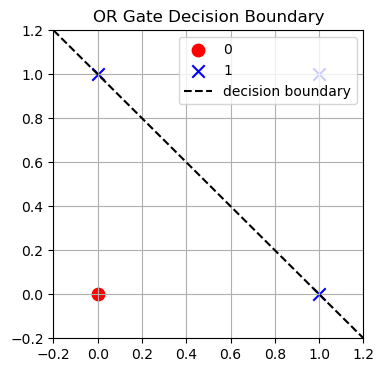

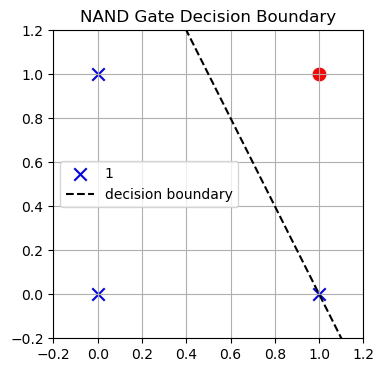

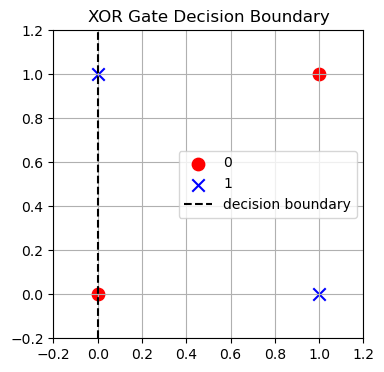

In [5]:
def plot_decision_boundary(p, X, y, title):
    plt.figure(figsize=(4,4))
    for i, point in enumerate(X):
        if y[i] == 0:
            plt.scatter(point[0], point[1], color="red", marker="o", s=80, label="0" if i==0 else "")
        else:
            plt.scatter(point[0], point[1], color="blue", marker="x", s=80, label="1" if i==1 else "")

    # Plot decision line only if weights are not all zero
    if not np.allclose(p.w, 0):
        if p.w[1] != 0:
            x_vals = np.linspace(-0.2, 1.2, 100)
            y_vals = -(p.w[0]*x_vals + p.b)/p.w[1]
            plt.plot(x_vals, y_vals, "k--", label="decision boundary")
        else:
            # vertical line case: w2=0 → line is x = -b/w1
            x_val = -p.b/p.w[0]
            plt.axvline(x_val, color="k", linestyle="--", label="decision boundary")

    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


for gate, info in results.items():
    p = Perceptron(2)
    p.w, p.b = info["weights"], info["bias"]   # reuse trained model
    plot_decision_boundary(p, X, gates[gate], f"{gate} Gate Decision Boundary")

In [ ]:
# -------------------------------
# USER INTERFACE
# -------------------------------
while True:
    gate_choice = input("\nEnter gate (AND/OR/NAND/XOR) or 'exit' to quit: ").upper()
    if gate_choice == "EXIT":
        print("Exiting...")
        break
    if gate_choice not in results:
        print("Invalid gate! Try again.")
        continue

    try:
        x1 = int(input("Enter Input 1 (0 or 1): "))
        x2 = int(input("Enter Input 2 (0 or 1): "))
        if x1 not in [0,1] or x2 not in [0,1]:
            print("Inputs must be 0 or 1. Try again.")
            continue
    except ValueError:
        print("Invalid input. Please enter 0 or 1.")
        continue

    # Load trained perceptron for chosen gate
    p = Perceptron(2)
    p.w, p.b = results[gate_choice]["weights"], results[gate_choice]["bias"]

    # Prediction
    output = p.predict_single(np.array([x1, x2]))
    print(f"Output of {gate_choice}({x1}, {x2}) = {output}")
